In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
network_path = os.path.join("networks", "striatum_with_dopamine")
network_file = os.path.join(network_path, "network-synapses.hdf5")
simulation_file = os.path.join(network_path, "simulation", "output_DA_sim.hdf5")

Loading networks/striatum_with_dopamine/simulation/output_DA_sim.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
26: (dSPN_1, p9faf904a, m71f9efc2)
106: (iSPN_0, pa8ced85f, m6486ed26)
112: (iSPN_0, pa8ced85f, mf2f3395e)
114: (iSPN_0, pa8ced85f, m3a845add)
Saving figure to networks/striatum_with_dopamine/figures/spike-raster.png


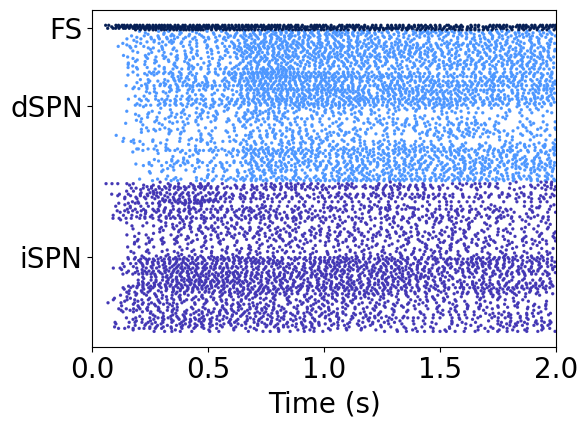

In [3]:
from snudda.plotting import SnuddaPlotSpikeRaster2
fig_file_raster = f"spike-raster.png"

from snudda.utils.load import SnuddaLoad
from snudda.utils.load_network_simulation import SnuddaLoadSimulation

sl = SnuddaLoad(network_file)
sls = SnuddaLoadSimulation(network_path=network_path,
                           network_simulation_output_file=simulation_file)

spr = SnuddaPlotSpikeRaster2(network_path=network_path,
                             network_file=network_file,
                             simulation_file=simulation_file,
                             snudda_load=sl, snudda_simulation_load=sls)

spr.plot_spike_raster(fig_file=fig_file_raster)

In [4]:
from snudda.plotting.plot_simulation_reaction_diffusion import PlotReactionDiffusion

# By passing the sls object we avoid loading it twice
prd = PlotReactionDiffusion(network_path=network_path,
                            simulation_file=simulation_file,
                            snudda_simulation=sls)

for i in [0, 100]:
    print(f"Neuron {i} has data: {prd.list_neuron_info(i)}\n\n")

ModuleNotFoundError: No module named 'snudda.plotting.plot_simulation_reaction_diffusion'

In [ ]:
prd.plot(neuron_id=0, species=["D1R_DA", "PKAc", "cAMP"], fig_name="biochem-0.png", title="dSPN selection of biochemical species")
prd.plot(neuron_id=0, species=['kaf_ms.modulation_factor_g', 'kaf_ms.modulation_factor_shift', 'kir_ms.modulation_factor', 'naf_ms.modulation_factor'], ylabel="Modulation", fig_name="modulation-0.png", title="dSPN modulation")

In [ ]:
prd.plot(neuron_id=100, species=["D2RDA", "PKAc", "cAMP"], fig_name="biochem-100.png", title="iSPN selection of biochemical species")
prd.plot(neuron_id=100, species=['kaf_ms.modulation_factor_g', 'kaf_ms.modulation_factor_shift', 'kir_ms.modulation_factor', 'naf_ms.modulation_factor'], ylabel="Modulation", 
         title="iSPN modulation", fig_name="modulation-100.png")